In [1]:
'''
import pandas as pd
NROWS = 50000

df = pd.read_json(
    "Data/goodreads_interactions_romance.json.gz",
    lines=True, compression="gzip", nrows=NROWS
)

df
'''

'\nimport pandas as pd\nNROWS = 50000\n\ndf = pd.read_json(\n    "Data/goodreads_interactions_romance.json.gz",\n    lines=True, compression="gzip", nrows=NROWS\n)\n\ndf\n'

In [2]:
'''
import pandas as pd
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np


# 1) Build weighted graph (same logic)
G = nx.Graph()
for book_id, group in df.groupby("book_id"):
    users = group["user_id"].dropna().astype(str).unique()
    for u1, u2 in combinations(users, 2):
        if G.has_edge(u1, u2):
            G[u1][u2]["weight"] += 1
        else:
            G.add_edge(u1, u2, weight=1)

print(f"Nodes: {G.number_of_nodes():,}")
print(f"Edges: {G.number_of_edges():,}")

# 2) Simple filtering knobs (tune these)
W_MIN = 6     # increase until the picture clears (try 6–10)
CORE_K = 3    # k-core to drop very low-degree nodes (try 2–5)
K = 50        # how many nodes to draw (try 30–80)

# keep strong ties only
edges_strong = [(u, v) for u, v, d in G.edges(data=True) if d["weight"] >= W_MIN]
G_strong = G.edge_subgraph(edges_strong).copy()
# k-core (if the graph becomes empty, skip it)
H0 = nx.k_core(G_strong, k=CORE_K) if G_strong.number_of_nodes() else G_strong

# pick top-K by (filtered) degree
deg = dict(H0.degree(weight=None))   # unweighted degree for picking visible hubs
top_nodes = [n for n, _ in sorted(deg.items(), key=lambda x: x[1], reverse=True)[:K]]
H = H0.subgraph(top_nodes).copy()

print(f"Plot subgraph -> nodes: {H.number_of_nodes()}, edges: {H.number_of_edges()}")

# 3) Basic encodings with CLIPPED sizes/widths
strength = dict(H.degree(weight="weight"))
# cap sizes so bubbles don't cover everything
node_sizes = [min(250, 30 + 2*strength.get(n, 0)) for n in H.nodes()]
# cap edge widths too
edge_widths = [min(1.5, 0.15 * H[u][v]["weight"]) for u, v in H.edges()]

# spread nodes out a bit more
k_param = 0.7 / np.sqrt(max(1, H.number_of_nodes()))
pos = nx.spring_layout(H, seed=42, k=k_param, iterations=100)

plt.figure(figsize=(9, 7))
nx.draw_networkx_nodes(H, pos, node_size=node_sizes, node_color="steelblue", alpha=0.9)
nx.draw_networkx_edges(H, pos, width=edge_widths, edge_color="gray", alpha=0.4)

# label only the top few by degree
label_n = 10
top_label_nodes = {n for n, _ in sorted(H.degree(), key=lambda x: x[1], reverse=True)[:label_n]}
labels = {n: (str(n) if n in top_label_nodes else "") for n in H.nodes()}
nx.draw_networkx_labels(H, pos, labels=labels, font_size=8)

plt.title(f"Goodreads user network (Top {K} | weight ≥ {W_MIN} | {CORE_K}-core)\n"
          "node size = weighted degree, edge width = shared-book weight")
plt.axis("off")
plt.show()
'''

'\nimport pandas as pd\nimport networkx as nx\nfrom itertools import combinations\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n\n# 1) Build weighted graph (same logic)\nG = nx.Graph()\nfor book_id, group in df.groupby("book_id"):\n    users = group["user_id"].dropna().astype(str).unique()\n    for u1, u2 in combinations(users, 2):\n        if G.has_edge(u1, u2):\n            G[u1][u2]["weight"] += 1\n        else:\n            G.add_edge(u1, u2, weight=1)\n\nprint(f"Nodes: {G.number_of_nodes():,}")\nprint(f"Edges: {G.number_of_edges():,}")\n\n# 2) Simple filtering knobs (tune these)\nW_MIN = 6     # increase until the picture clears (try 6–10)\nCORE_K = 3    # k-core to drop very low-degree nodes (try 2–5)\nK = 50        # how many nodes to draw (try 30–80)\n\n# keep strong ties only\nedges_strong = [(u, v) for u, v, d in G.edges(data=True) if d["weight"] >= W_MIN]\nG_strong = G.edge_subgraph(edges_strong).copy()\n# k-core (if the graph becomes empty, skip it)\nH0 = nx.k_cor

In [3]:
'''
import pandas as pd
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np


# 1) Build weighted graph (same logic)
G = nx.Graph()
for book_id, group in df.groupby("book_id"):
    users = group["user_id"].dropna().astype(str).unique()
    for u1, u2 in combinations(users, 2):
        if G.has_edge(u1, u2):
            G[u1][u2]["weight"] += 1
        else:
            G.add_edge(u1, u2, weight=1)

print(f"Nodes: {G.number_of_nodes():,}")
print(f"Edges: {G.number_of_edges():,}")

# 2) Simple filtering knobs (tune these)
W_MIN = 10     # increase until the picture clears (try 6–10)
CORE_K = 5    # k-core to drop very low-degree nodes (try 2–5)
K = 50        # how many nodes to draw (try 30–80)

# keep strong ties only
edges_strong = [(u, v) for u, v, d in G.edges(data=True) if d["weight"] >= W_MIN]
G_strong = G.edge_subgraph(edges_strong).copy()
# k-core (if the graph becomes empty, skip it)
H0 = nx.k_core(G_strong, k=CORE_K) if G_strong.number_of_nodes() else G_strong

# pick top-K by (filtered) degree
deg = dict(H0.degree(weight=None))   # unweighted degree for picking visible hubs
top_nodes = [n for n, _ in sorted(deg.items(), key=lambda x: x[1], reverse=True)[:K]]
H = H0.subgraph(top_nodes).copy()

print(f"Plot subgraph -> nodes: {H.number_of_nodes()}, edges: {H.number_of_edges()}")

# 3) Basic encodings with CLIPPED sizes/widths
strength = dict(H.degree(weight="weight"))
# cap sizes so bubbles don't cover everything
node_sizes = [min(250, 30 + 2*strength.get(n, 0)) for n in H.nodes()]
# cap edge widths too
edge_widths = [min(1.5, 0.15 * H[u][v]["weight"]) for u, v in H.edges()]

# spread nodes out a bit more
k_param = 0.7 / np.sqrt(max(1, H.number_of_nodes()))
pos = nx.spring_layout(H, seed=42, k=k_param, iterations=100)

plt.figure(figsize=(9, 7))
nx.draw_networkx_nodes(H, pos, node_size=node_sizes, node_color="steelblue", alpha=0.9)
nx.draw_networkx_edges(H, pos, width=edge_widths, edge_color="gray", alpha=0.4)

# label only the top few by degree
label_n = 5
top_label_nodes = {n for n, _ in sorted(H.degree(), key=lambda x: x[1], reverse=True)[:label_n]}
labels = {n: (str(n) if n in top_label_nodes else "") for n in H.nodes()}
nx.draw_networkx_labels(H, pos, labels=labels, font_size=8)

plt.title(f"Goodreads user network (Top {K} | weight ≥ {W_MIN} | {CORE_K}-core)\n"
          "node size = weighted degree, edge width = shared-book weight")
plt.axis("off")
plt.show()
'''

'\nimport pandas as pd\nimport networkx as nx\nfrom itertools import combinations\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n\n# 1) Build weighted graph (same logic)\nG = nx.Graph()\nfor book_id, group in df.groupby("book_id"):\n    users = group["user_id"].dropna().astype(str).unique()\n    for u1, u2 in combinations(users, 2):\n        if G.has_edge(u1, u2):\n            G[u1][u2]["weight"] += 1\n        else:\n            G.add_edge(u1, u2, weight=1)\n\nprint(f"Nodes: {G.number_of_nodes():,}")\nprint(f"Edges: {G.number_of_edges():,}")\n\n# 2) Simple filtering knobs (tune these)\nW_MIN = 10     # increase until the picture clears (try 6–10)\nCORE_K = 5    # k-core to drop very low-degree nodes (try 2–5)\nK = 50        # how many nodes to draw (try 30–80)\n\n# keep strong ties only\nedges_strong = [(u, v) for u, v, d in G.edges(data=True) if d["weight"] >= W_MIN]\nG_strong = G.edge_subgraph(edges_strong).copy()\n# k-core (if the graph becomes empty, skip it)\nH0 = nx.k_co

In [4]:
'''
if G_strong.number_of_nodes() > 0 and G_strong.number_of_edges() > 0:
    gcc_nodes_strong = max(nx.connected_components(G_strong), key=len)
    GCC_strong = G_strong.subgraph(gcc_nodes_strong).copy()

    print(f"Nodes in GCC (strong-tie graph): {GCC_strong.number_of_nodes():,}")
    print(f"Edges in GCC (strong-tie graph): {GCC_strong.number_of_edges():,}")

    plt.figure(figsize=(8, 7))
    pos = nx.spring_layout(GCC_strong, seed=42)
    nx.draw_networkx_nodes(GCC_strong, pos, node_size=25, node_color="orange", alpha=0.9)
    nx.draw_networkx_edges(GCC_strong, pos, width=0.3, edge_color="gray", alpha=0.4)
    plt.title("Largest Connected Component (strong-tie graph)")
    plt.axis("off"); plt.show()
else:
    print("Strong-tie graph is empty or disconnected too much at this threshold.")
'''

'\nif G_strong.number_of_nodes() > 0 and G_strong.number_of_edges() > 0:\n    gcc_nodes_strong = max(nx.connected_components(G_strong), key=len)\n    GCC_strong = G_strong.subgraph(gcc_nodes_strong).copy()\n\n    print(f"Nodes in GCC (strong-tie graph): {GCC_strong.number_of_nodes():,}")\n    print(f"Edges in GCC (strong-tie graph): {GCC_strong.number_of_edges():,}")\n\n    plt.figure(figsize=(8, 7))\n    pos = nx.spring_layout(GCC_strong, seed=42)\n    nx.draw_networkx_nodes(GCC_strong, pos, node_size=25, node_color="orange", alpha=0.9)\n    nx.draw_networkx_edges(GCC_strong, pos, width=0.3, edge_color="gray", alpha=0.4)\n    plt.title("Largest Connected Component (strong-tie graph)")\n    plt.axis("off"); plt.show()\nelse:\n    print("Strong-tie graph is empty or disconnected too much at this threshold.")\n'

In [5]:
'''
# Diameter
print("Diameter")
print(nx.diameter(GCC_strong))

# Average clustering coefficient
print("\nAverage clustering coefficient")
print(nx.average_clustering(GCC_strong))

# Transitivity (global clustering coefficient)
print("\nTransitivity (global clustering coefficient)")
print(nx.transitivity(GCC_strong))

# Average degree (2m/n)
n = GCC_strong.number_of_nodes()
m = GCC_strong.number_of_edges()
print("\nAverage degree")
print(2 * m / n)

# Density
print("\nDensity")
print(nx.density(GCC_strong))
'''

'\n# Diameter\nprint("Diameter")\nprint(nx.diameter(GCC_strong))\n\n# Average clustering coefficient\nprint("\nAverage clustering coefficient")\nprint(nx.average_clustering(GCC_strong))\n\n# Transitivity (global clustering coefficient)\nprint("\nTransitivity (global clustering coefficient)")\nprint(nx.transitivity(GCC_strong))\n\n# Average degree (2m/n)\nn = GCC_strong.number_of_nodes()\nm = GCC_strong.number_of_edges()\nprint("\nAverage degree")\nprint(2 * m / n)\n\n# Density\nprint("\nDensity")\nprint(nx.density(GCC_strong))\n'

In [6]:
'''
print("Degree assortativity coefficient")
r = nx.degree_assortativity_coefficient(GCC_strong)
print(r)
'''

'\nprint("Degree assortativity coefficient")\nr = nx.degree_assortativity_coefficient(GCC_strong)\nprint(r)\n'

In [7]:
'''
# Edge normalization
import math, networkx as nx, pandas as pd, numpy as np

deg = dict(GCC_strong.degree())
strength = dict(GCC_strong.degree(weight='weight'))
for u,v,d in GCC_strong.edges(data=True):
    w = d.get('weight',1)
    d['lift'] = (w / math.sqrt(max(strength[u],1)*max(strength[v],1)))
    denom = deg[u] + deg[v] - w
    d['jaccard'] = w/denom if denom>0 else 0.0

# Communities
from networkx.algorithms.community import louvain_communities
comms = louvain_communities(GCC_strong, weight='lift', seed=42)
cid = {n:i for i,C in enumerate(comms) for n in C}
nx.set_node_attributes(GCC_strong, cid, 'community')
print(f"Communities found: {len(comms)}")

# Modularity (higher = clearer communities)
from networkx.algorithms.community.quality import modularity
Q = modularity(GCC_strong, comms, weight='lift')

# Density, clustering, assortativity (by community)
dens = nx.density(GCC_strong)
Cbar = nx.average_clustering(GCC_strong, weight='lift')

# (Optional) if you have a 'genre' attribute on nodes:
# nx.attribute_assortativity_coefficient(G, 'genre')

print(f"Modularity Q={Q:.3f} | Density={dens:.4f} | Avg clustering={Cbar:.3f}")
'''

'\n# Edge normalization\nimport math, networkx as nx, pandas as pd, numpy as np\n\ndeg = dict(GCC_strong.degree())\nstrength = dict(GCC_strong.degree(weight=\'weight\'))\nfor u,v,d in GCC_strong.edges(data=True):\n    w = d.get(\'weight\',1)\n    d[\'lift\'] = (w / math.sqrt(max(strength[u],1)*max(strength[v],1)))\n    denom = deg[u] + deg[v] - w\n    d[\'jaccard\'] = w/denom if denom>0 else 0.0\n\n# Communities\nfrom networkx.algorithms.community import louvain_communities\ncomms = louvain_communities(GCC_strong, weight=\'lift\', seed=42)\ncid = {n:i for i,C in enumerate(comms) for n in C}\nnx.set_node_attributes(GCC_strong, cid, \'community\')\nprint(f"Communities found: {len(comms)}")\n\n# Modularity (higher = clearer communities)\nfrom networkx.algorithms.community.quality import modularity\nQ = modularity(GCC_strong, comms, weight=\'lift\')\n\n# Density, clustering, assortativity (by community)\ndens = nx.density(GCC_strong)\nCbar = nx.average_clustering(GCC_strong, weight=\'lift\

In [8]:
'''
# Compute centralities
degree_centrality      = nx.degree_centrality(GCC_strong)
betweenness_centrality = nx.betweenness_centrality(GCC_strong)
closeness_centrality   = nx.closeness_centrality(GCC_strong)
eigenvector_centrality = nx.eigenvector_centrality(GCC_strong)

# Assemble results
df = pd.DataFrame({
    "Node":        list(GCC_strong.nodes()),
    "Degree":      [degree_centrality[n]      for n in GCC_strong.nodes()],
    "Betweenness": [betweenness_centrality[n] for n in GCC_strong.nodes()],
    "Closeness":   [closeness_centrality[n]   for n in GCC_strong.nodes()],
    "Eigenvector": [eigenvector_centrality[n] for n in GCC_strong.nodes()],
}).sort_values("Node").reset_index(drop=True)

# Top-5 per metric
k = 5
for metric in ["Degree", "Betweenness", "Closeness", "Eigenvector"]:
    topk = df.nlargest(k, metric)[["Node", metric]].reset_index(drop=True)
    topk.index = topk.index + 1
    print(f"\nTop {k} by {metric}:")
    print(topk.to_string())

# (ii) Bonus: scatter plots of centralities against each other

from scipy.stats import pearsonr

pairs = [
    ("Degree", "Betweenness"),
    ("Degree", "Closeness"),
    ("Degree", "Eigenvector"),
    ("Betweenness", "Closeness"),
    ("Betweenness", "Eigenvector"),
    ("Closeness", "Eigenvector"),
]

for x, y in pairs:
    plt.figure(figsize=(5.2, 4))
    r, _ = pearsonr(df[x], df[y])
    plt.scatter(df[x], df[y], s=35, alpha=0.85)
    plt.title(f"{x} vs {y} (r = {r:.2f})")
    plt.xlabel(f"{x} Centrality")
    plt.ylabel(f"{y} Centrality")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
'''

'\n# Compute centralities\ndegree_centrality      = nx.degree_centrality(GCC_strong)\nbetweenness_centrality = nx.betweenness_centrality(GCC_strong)\ncloseness_centrality   = nx.closeness_centrality(GCC_strong)\neigenvector_centrality = nx.eigenvector_centrality(GCC_strong)\n\n# Assemble results\ndf = pd.DataFrame({\n    "Node":        list(GCC_strong.nodes()),\n    "Degree":      [degree_centrality[n]      for n in GCC_strong.nodes()],\n    "Betweenness": [betweenness_centrality[n] for n in GCC_strong.nodes()],\n    "Closeness":   [closeness_centrality[n]   for n in GCC_strong.nodes()],\n    "Eigenvector": [eigenvector_centrality[n] for n in GCC_strong.nodes()],\n}).sort_values("Node").reset_index(drop=True)\n\n# Top-5 per metric\nk = 5\nfor metric in ["Degree", "Betweenness", "Closeness", "Eigenvector"]:\n    topk = df.nlargest(k, metric)[["Node", metric]].reset_index(drop=True)\n    topk.index = topk.index + 1\n    print(f"\nTop {k} by {metric}:")\n    print(topk.to_string())\n\n# (

In [9]:
'''
try:
    import community as community_louvain
except ImportError:
    import community.community_louvain as community_louvain
from matplotlib.colors import ListedColormap
from matplotlib import colormaps

# --- Run Louvain on GCC_strong instead of G ---
partition = community_louvain.best_partition(GCC_strong, random_state=42)

# Communities → indices
communities = sorted(set(partition.values()))
cid2idx     = {c: i for i, c in enumerate(communities)}

# Node order, sizes, colors (aligned)
nodelist   = list(GCC_strong.nodes())
node_sizes = [1 + 0.1 * GCC_strong.degree(n) for n in nodelist]
color_idx  = [cid2idx[partition[n]] for n in nodelist]
K          = len(communities)

# Colormap (handle K > 20)
base = colormaps['tab20'].colors
if K <= len(base):
    cmap = ListedColormap(base[:K])
else:
    reps = (K + len(base) - 1) // len(base)
    cmap = ListedColormap((base * reps)[:K])

# Layout (once, for GCC_strong)
pos = nx.spring_layout(GCC_strong, seed=42)

# Draw
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw_networkx_edges(GCC_strong, pos, ax=ax, alpha=0.6, width=0.2)
nx.draw_networkx_nodes(
    GCC_strong, pos, nodelist=nodelist, ax=ax,
    node_size=node_sizes,
    node_color=color_idx,
    cmap=cmap,
    vmin=-0.5, vmax=K - 0.5,
    alpha=1.0,
    linewidths=0
)
ax.set_axis_off()
plt.title("Communities in GCC_strong (Louvain)")
plt.tight_layout(pad=0)
plt.show()
'''

'\ntry:\n    import community as community_louvain\nexcept ImportError:\n    import community.community_louvain as community_louvain\nfrom matplotlib.colors import ListedColormap\nfrom matplotlib import colormaps\n\n# --- Run Louvain on GCC_strong instead of G ---\npartition = community_louvain.best_partition(GCC_strong, random_state=42)\n\n# Communities → indices\ncommunities = sorted(set(partition.values()))\ncid2idx     = {c: i for i, c in enumerate(communities)}\n\n# Node order, sizes, colors (aligned)\nnodelist   = list(GCC_strong.nodes())\nnode_sizes = [1 + 0.1 * GCC_strong.degree(n) for n in nodelist]\ncolor_idx  = [cid2idx[partition[n]] for n in nodelist]\nK          = len(communities)\n\n# Colormap (handle K > 20)\nbase = colormaps[\'tab20\'].colors\nif K <= len(base):\n    cmap = ListedColormap(base[:K])\nelse:\n    reps = (K + len(base) - 1) // len(base)\n    cmap = ListedColormap((base * reps)[:K])\n\n# Layout (once, for GCC_strong)\npos = nx.spring_layout(GCC_strong, seed=

In [10]:
'''
from networkx.algorithms import community as nx_comm
from matplotlib import colormaps

# ---- Greedy modularity maximization on GCC_strong ----------------------------
communities = nx_comm.greedy_modularity_communities(GCC_strong)
community_list = [list(c) for c in communities]

# ---- node → community index mapping ------------------------------------------
partition = {}
for cid, comm in enumerate(community_list):
    for n in comm:
        partition[n] = cid

# ---- color indices -----------------------------------------------------------
communities_ids = sorted(set(partition.values()))
cid2idx = {c: i for i, c in enumerate(communities_ids)}
color_idx = [cid2idx[partition[n]] for n in GCC_strong.nodes()]

# tab20/Paired with exactly len(communities) discrete colors
cmap = colormaps["Paired"].resampled(len(communities))

# ---- sizes -------------------------------------------------------------------
nodelist   = list(GCC_strong.nodes())
node_sizes = [1 + 0.1 * GCC_strong.degree(n) for n in nodelist]  # degree-based sizing

# ---- layout ------------------------------------------------------------------
pos = nx.spring_layout(GCC_strong, seed=42)

# ---- draw --------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw_networkx_edges(GCC_strong, pos, ax=ax, alpha=0.6, width=0.2)
nx.draw_networkx_nodes(
    GCC_strong, pos, nodelist=nodelist, ax=ax,
    node_size=node_sizes,
    node_color=color_idx,
    cmap=cmap,
    vmin=-0.5, vmax=len(communities_ids)-0.5,
    alpha=0.9,
)
ax.set_axis_off()
plt.title("Communities in GCC_strong (Greedy modularity)")
plt.tight_layout(pad=0)
plt.show()

# ---- quick summary for reporting --------------------------------------------
print(f"Number of communities detected: {len(communities)}")
print("Community sizes:", [len(c) for c in communities])
'''

'\nfrom networkx.algorithms import community as nx_comm\nfrom matplotlib import colormaps\n\n# ---- Greedy modularity maximization on GCC_strong ----------------------------\ncommunities = nx_comm.greedy_modularity_communities(GCC_strong)\ncommunity_list = [list(c) for c in communities]\n\n# ---- node → community index mapping ------------------------------------------\npartition = {}\nfor cid, comm in enumerate(community_list):\n    for n in comm:\n        partition[n] = cid\n\n# ---- color indices -----------------------------------------------------------\ncommunities_ids = sorted(set(partition.values()))\ncid2idx = {c: i for i, c in enumerate(communities_ids)}\ncolor_idx = [cid2idx[partition[n]] for n in GCC_strong.nodes()]\n\n# tab20/Paired with exactly len(communities) discrete colors\ncmap = colormaps["Paired"].resampled(len(communities))\n\n# ---- sizes -------------------------------------------------------------------\nnodelist   = list(GCC_strong.nodes())\nnode_sizes = [1 + 

In [11]:
'''
from networkx.algorithms import community as nx_comm
from matplotlib import colormaps

# ---- Parameters -------------------------------------------------------------
k = 5  # desired number of communities

# ---- Safety: asyn_fluidc needs a connected graph and k <= |V| ---------------
assert nx.is_connected(GCC_strong), "GCC_strong must be connected."
k = min(k, GCC_strong.number_of_nodes())

# ---- Asynchronous Fluid Communities ----------------------------------------
communities_iter = nx_comm.asyn_fluidc(GCC_strong, k, seed=42)
community_list = [set(c) for c in communities_iter]
K = len(community_list)

# ---- node → community index mapping ----------------------------------------
partition = {n: cid for cid, comm in enumerate(community_list) for n in comm}

# ---- node order & color indices (aligned) -----------------------------------
nodelist  = list(GCC_strong.nodes())
color_idx = [partition[n] for n in nodelist]

# ---- discrete colormap ------------------------------------------------------
cmap = colormaps["Paired"].resampled(K)

# ---- sizes ------------------------------------------------------------------
node_sizes = [1 + 0.1 * GCC_strong.degree(n) for n in nodelist]  # degree-based sizing

# ---- layout -----------------------------------------------------------------
pos = nx.spring_layout(GCC_strong, seed=42)

# ---- draw -------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw_networkx_edges(GCC_strong, pos, ax=ax, alpha=0.6, width=0.2)
nx.draw_networkx_nodes(
    GCC_strong, pos, nodelist=nodelist, ax=ax,
    node_size=node_sizes,
    node_color=color_idx,
    cmap=cmap,
    vmin=-0.5, vmax=K - 0.5,
    alpha=0.95,
    linewidths=0
)
ax.set_axis_off()
plt.title(f"asyn_fluidc communities on GCC_strong (k={K})")
plt.tight_layout(pad=0)
plt.show()

# ---- quick summary for your report ------------------------------------------
print(f"Communities found (k requested = 5, used = {K}): {K}")
print("Community sizes:", [len(c) for c in community_list])
'''

'\nfrom networkx.algorithms import community as nx_comm\nfrom matplotlib import colormaps\n\n# ---- Parameters -------------------------------------------------------------\nk = 5  # desired number of communities\n\n# ---- Safety: asyn_fluidc needs a connected graph and k <= |V| ---------------\nassert nx.is_connected(GCC_strong), "GCC_strong must be connected."\nk = min(k, GCC_strong.number_of_nodes())\n\n# ---- Asynchronous Fluid Communities ----------------------------------------\ncommunities_iter = nx_comm.asyn_fluidc(GCC_strong, k, seed=42)\ncommunity_list = [set(c) for c in communities_iter]\nK = len(community_list)\n\n# ---- node → community index mapping ----------------------------------------\npartition = {n: cid for cid, comm in enumerate(community_list) for n in comm}\n\n# ---- node order & color indices (aligned) -----------------------------------\nnodelist  = list(GCC_strong.nodes())\ncolor_idx = [partition[n] for n in nodelist]\n\n# ---- discrete colormap -------------

# Load Data

In [12]:
import pandas as pd
NROWS = 10000

df = pd.read_json(
    "Data/goodreads_reviews_history_biography.json.gz",
    lines=True, compression="gzip", nrows=NROWS
)
df.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,29893493,c23406fb584d6304d1dd4c75ce26ea3a,5,I haven't read a non-fiction book this engagin...,Thu Dec 15 10:51:26 -0800 2016,Sun Mar 12 23:33:51 -0700 2017,Thu Mar 09 15:34:06 -0800 2017,Tue Feb 28 17:55:35 -0800 2017,29,8
1,8842281e1d1347389f2ab93d60773d4d,8191070,8fb75b37b3613a34e39169f139870f31,5,"Best book of the series, and best book about A...",Fri Nov 18 17:43:26 -0800 2016,Thu Aug 03 22:54:31 -0700 2017,Mon Jul 24 09:32:34 -0700 2017,Mon May 08 07:52:12 -0700 2017,25,0
2,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,,,5,1
3,8842281e1d1347389f2ab93d60773d4d,16064871,0737dc907735d9c77d21b676ec4ba658,5,A fascinating look at the early part of LBJ's ...,Mon Sep 26 08:45:50 -0700 2016,Wed Jan 04 01:26:15 -0800 2017,Fri Nov 18 00:00:00 -0800 2016,Mon Sep 26 00:00:00 -0700 2016,6,0
4,8842281e1d1347389f2ab93d60773d4d,19398490,ea4a220b10e6b5c796dae0e3b970aff1,4,A beautiful story. It is rare to encounter a b...,Sun Jan 03 21:20:46 -0800 2016,Tue Sep 20 23:30:15 -0700 2016,Tue Sep 13 11:51:51 -0700 2016,Sat Aug 20 07:03:03 -0700 2016,35,5


In [13]:
# Keep only selected columns
df = df[['user_id', 'book_id', 'review_id', 'rating', 'review_text']]

# Check the result
df.head()


,user_id,book_id,review_id,rating,review_text
0,8842281e1d1347389f2ab93d60773d4d,29893493,c23406fb584d6304d1dd4c75ce26ea3a,5,I haven't read a non-fiction book this engagin...
1,8842281e1d1347389f2ab93d60773d4d,8191070,8fb75b37b3613a34e39169f139870f31,5,"Best book of the series, and best book about A..."
2,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...
3,8842281e1d1347389f2ab93d60773d4d,16064871,0737dc907735d9c77d21b676ec4ba658,5,A fascinating look at the early part of LBJ's ...
4,8842281e1d1347389f2ab93d60773d4d,19398490,ea4a220b10e6b5c796dae0e3b970aff1,4,A beautiful story. It is rare to encounter a b...


# User to User

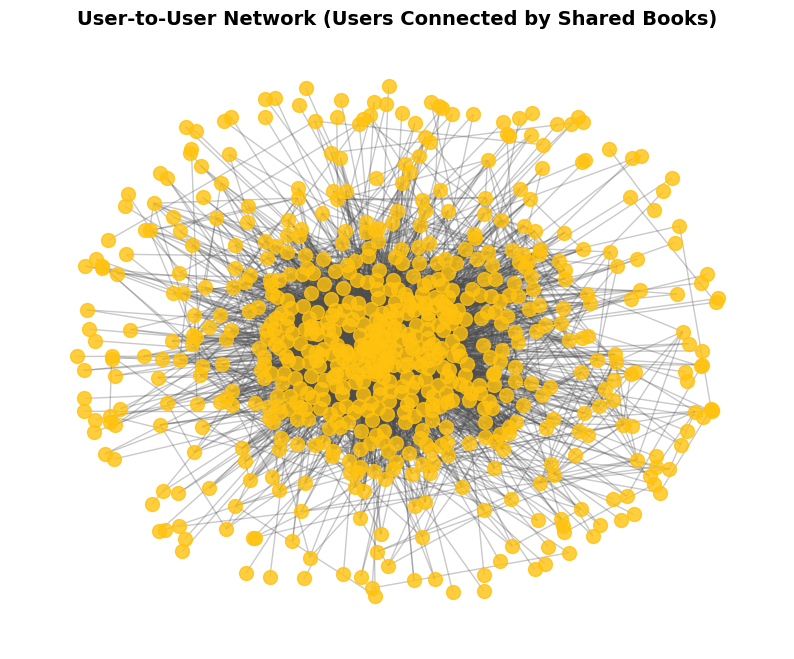

Number of users (nodes): 696
Number of connections (edges): 9381


In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Assume df has the columns: user_id, book_id, review_id, rating, review_text

# --- Create the user-to-user edges based on shared books ---
edges = []

# For each book, find all users who reviewed it
for book, group in df.groupby('book_id'):
    users = group['user_id'].unique()
    # Connect every pair of users who reviewed the same book
    edges.extend(list(combinations(users, 2)))

# Create the graph
G = nx.Graph()
G.add_edges_from(edges)

# --- Visualization ---
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.4, seed=42)

nx.draw_networkx_nodes(G, pos, node_size=100, node_color="#FFC20E", alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color="#4D4D4D", alpha=0.3)

plt.title("User-to-User Network (Users Connected by Shared Books)", fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

print(f"Number of users (nodes): {G.number_of_nodes()}")
print(f"Number of connections (edges): {G.number_of_edges()}")


            weight
count  9381.000000
mean      1.225136
std       0.893981
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      25.000000
Threshold ≥5: nodes=46, edges=101


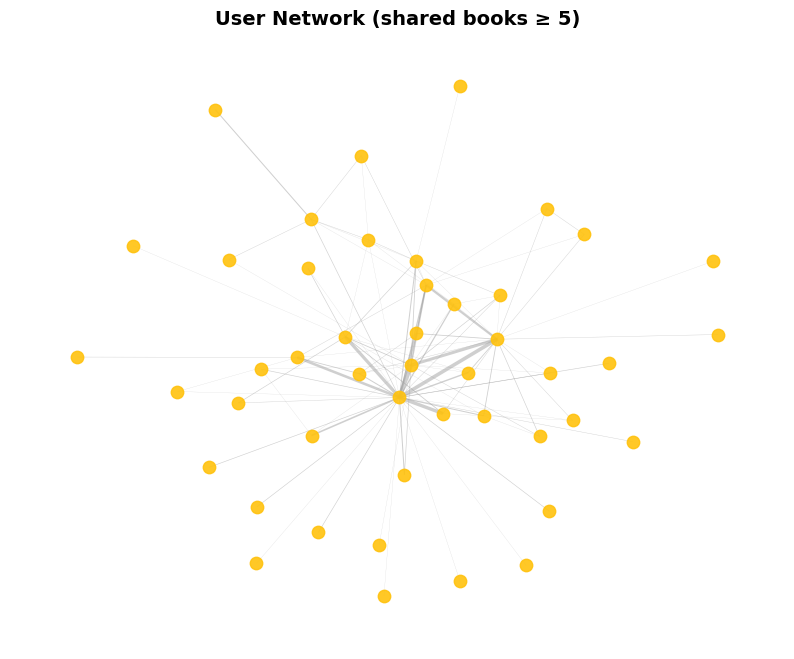

In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# --- 1) Build weighted user–user edges (how many books two users both reviewed) ---
# Use unique (user, book) to avoid double-counting
ub = df[['user_id','book_id']].drop_duplicates()

# All user pairs per book, then count occurrences = weight
pairs = (
    ub.merge(ub, on='book_id')
      .query('user_id_x < user_id_y')               # drop self-pairs and duplicates
      .groupby(['user_id_x','user_id_y'])
      .size()
      .rename('weight')
      .reset_index()
)

print(pairs.describe())  # quick look at weight distribution

# --- 2) Filter by weight threshold ---
MIN_SHARED = 5   # <-- try 2, 3, 5 depending on how much you want to thin
pairs_f = pairs[pairs['weight'] >= MIN_SHARED]

# Optional: also drop nodes that become isolated after filtering
users_keep = set(pairs_f['user_id_x']) | set(pairs_f['user_id_y'])

# --- 3) Build the weighted graph ---
G = nx.Graph()
G.add_weighted_edges_from(pairs_f[['user_id_x','user_id_y','weight']].itertuples(index=False, name=None))

# Focus on the largest connected component to “break down” further
if G.number_of_nodes() > 0:
    largest_cc = max(nx.connected_components(G), key=len)
    H = G.subgraph(largest_cc).copy()
else:
    H = G

print(f"Threshold ≥{MIN_SHARED}: nodes={H.number_of_nodes()}, edges={H.number_of_edges()}")

# --- 4) Visualize with weight-based styling ---
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(H, k=0.35, seed=42)

# Edge width scales with weight (clamped so lines don't get too thick)
w = pd.Series(nx.get_edge_attributes(H, 'weight'))
ew = (w - w.min() + 1) / (w.max() - w.min() + 1) * 3.0  # scale to ~[1,3]
ew = [ew.get((u,v)) or ew.get((v,u)) or 1 for u,v in H.edges()]

nx.draw_networkx_edges(H, pos, width=ew, edge_color="#A0A0A0", alpha=0.5)
nx.draw_networkx_nodes(H, pos, node_size=80, node_color="#FFC20E", alpha=0.9)

plt.title(f"User Network (shared books ≥ {MIN_SHARED})", fontsize=14, fontweight="bold")
plt.axis('off')
plt.show()


            weight
count  9381.000000
mean      1.225136
std       0.893981
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      25.000000
Threshold ≥3: nodes=116, edges=377


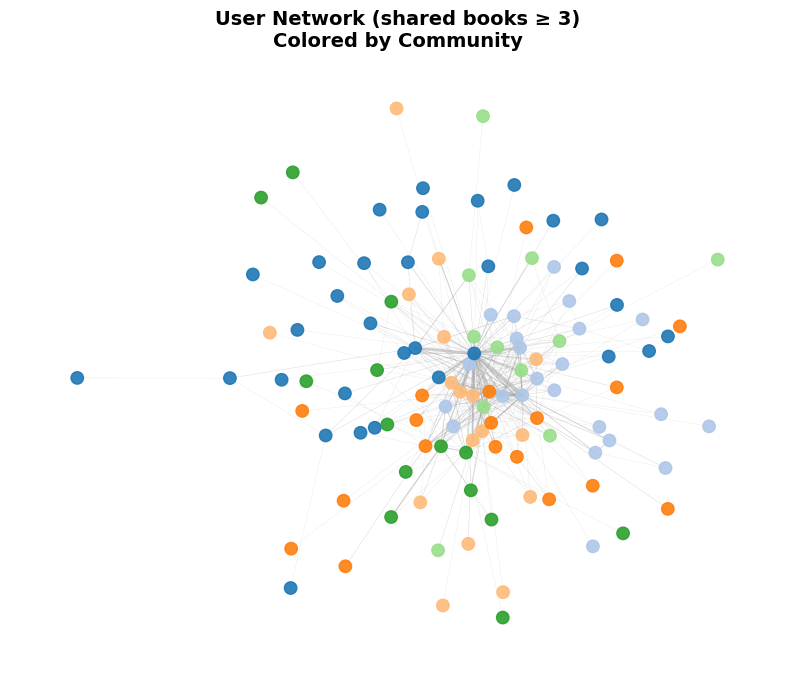

In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

# --- 1) Build weighted user–user edges (how many books two users both reviewed) ---
# Use unique (user, book) to avoid double-counting
ub = df[['user_id','book_id']].drop_duplicates()

# All user pairs per book, then count occurrences = weight
pairs = (
    ub.merge(ub, on='book_id')
      .query('user_id_x < user_id_y')               # drop self-pairs and duplicates
      .groupby(['user_id_x','user_id_y'])
      .size()
      .rename('weight')
      .reset_index()
)

print(pairs.describe())  # quick look at weight distribution

# --- 2) Filter by weight threshold ---
MIN_SHARED = 3   # <-- try 2, 3, 5 depending on how much you want to thin
pairs_f = pairs[pairs['weight'] >= MIN_SHARED]

# Optional: also drop nodes that become isolated after filtering
users_keep = set(pairs_f['user_id_x']) | set(pairs_f['user_id_y'])

# --- 3) Build the weighted graph ---
G = nx.Graph()
G.add_weighted_edges_from(pairs_f[['user_id_x','user_id_y','weight']].itertuples(index=False, name=None))

# Focus on the largest connected component to “break down” further
if G.number_of_nodes() > 0:
    largest_cc = max(nx.connected_components(G), key=len)
    H = G.subgraph(largest_cc).copy()
else:
    H = G

print(f"Threshold ≥{MIN_SHARED}: nodes={H.number_of_nodes()}, edges={H.number_of_edges()}")

# --- 4) Community detection + visualization with Tab20 ---

# detect communities
comms = list(community.greedy_modularity_communities(H))
comm_map = {}
for i, c in enumerate(comms):
    for n in c:
        comm_map[n] = i

nx.set_node_attributes(H, comm_map, "community")

# layout
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(H, k=0.35, seed=42)

# edge widths by weight
w = pd.Series(nx.get_edge_attributes(H, 'weight'))
ew = (w - w.min() + 1) / (w.max() - w.min() + 1) * 3.0
ew = [ew.get((u, v)) or ew.get((v, u)) or 1 for u, v in H.edges()]

# node colors by community (Tab20 for consistency)
node_colors = [plt.cm.tab20(comm_map[n] % 20) for n in H.nodes()]

nx.draw_networkx_edges(H, pos, width=ew, edge_color="#A0A0A0", alpha=0.5)
nx.draw_networkx_nodes(H, pos, node_size=80, node_color=node_colors, alpha=0.9)

plt.title(f"User Network (shared books ≥ {MIN_SHARED})\nColored by Community", fontsize=14, fontweight="bold")
plt.axis("off")
plt.show()


In [17]:
# --- 5) Summary stats for slides, like the Romance Users dict ---

# avg degree
degrees = dict(H.degree())
avg_degree = sum(degrees.values()) / H.number_of_nodes() if H.number_of_nodes() > 0 else 0

summary_history_users = {
    "genre": "History Users",
    "n_users": H.number_of_nodes(),
    "n_edges": H.number_of_edges(),
    "density": nx.density(H),
    "avg_degree": avg_degree,
    "avg_clustering": nx.average_clustering(H),
    "n_communities": len(comms),
    "largest_comm_size": max(len(c) for c in comms) if comms else 0,
}

print(summary_history_users)



{'genre': 'History Users', 'n_users': 116, 'n_edges': 377, 'density': 0.05652173913043478, 'avg_degree': 6.5, 'avg_clustering': 0.47800517765376854, 'n_communities': 6, 'largest_comm_size': 32}


            weight
count  9381.000000
mean      1.225136
std       0.893981
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      25.000000
Threshold ≥4: nodes=69, edges=171


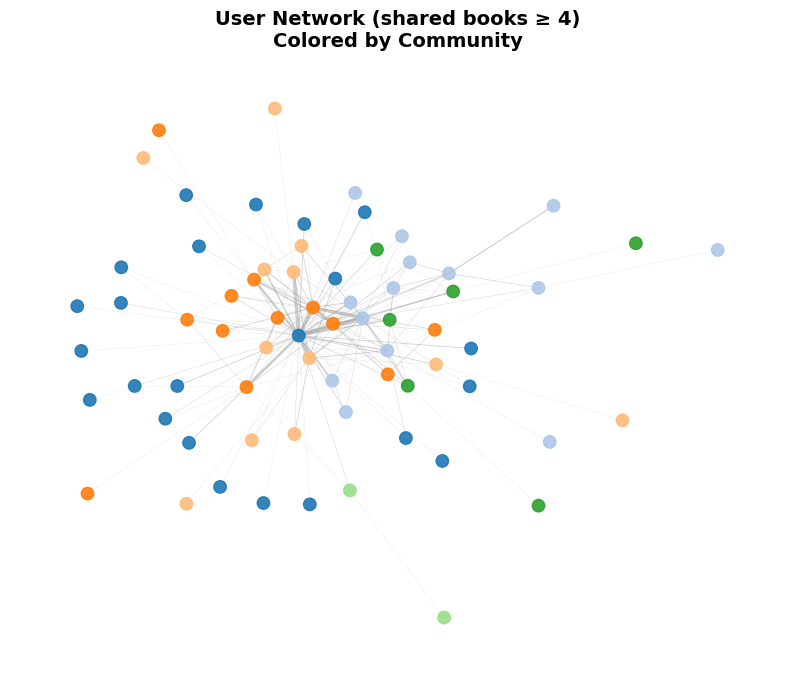

In [18]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# --- 1) Build weighted user–user edges (how many books two users both reviewed) ---
# Use unique (user, book) to avoid double-counting
ub = df[['user_id','book_id']].drop_duplicates()

# All user pairs per book, then count occurrences = weight
pairs = (
    ub.merge(ub, on='book_id')
      .query('user_id_x < user_id_y')               # drop self-pairs and duplicates
      .groupby(['user_id_x','user_id_y'])
      .size()
      .rename('weight')
      .reset_index()
)

print(pairs.describe())  # quick look at weight distribution

# --- 2) Filter by weight threshold ---
MIN_SHARED = 4   # <-- try 2, 3, 5 depending on how much you want to thin
pairs_f = pairs[pairs['weight'] >= MIN_SHARED]

# Optional: also drop nodes that become isolated after filtering
users_keep = set(pairs_f['user_id_x']) | set(pairs_f['user_id_y'])

# --- 3) Build the weighted graph ---
G = nx.Graph()
G.add_weighted_edges_from(pairs_f[['user_id_x','user_id_y','weight']].itertuples(index=False, name=None))

# Focus on the largest connected component to “break down” further
if G.number_of_nodes() > 0:
    largest_cc = max(nx.connected_components(G), key=len)
    H = G.subgraph(largest_cc).copy()
else:
    H = G

print(f"Threshold ≥{MIN_SHARED}: nodes={H.number_of_nodes()}, edges={H.number_of_edges()}")

# --- 4) Community detection + visualization with Tab20 ---

# detect communities
comms = list(community.greedy_modularity_communities(H))
comm_map = {}
for i, c in enumerate(comms):
    for n in c:
        comm_map[n] = i

nx.set_node_attributes(H, comm_map, "community")

# layout
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(H, k=0.35, seed=42)

# edge widths by weight
w = pd.Series(nx.get_edge_attributes(H, 'weight'))
ew = (w - w.min() + 1) / (w.max() - w.min() + 1) * 3.0
ew = [ew.get((u, v)) or ew.get((v, u)) or 1 for u, v in H.edges()]

# node colors by community (Tab20 for consistency)
node_colors = [plt.cm.tab20(comm_map[n] % 20) for n in H.nodes()]

nx.draw_networkx_edges(H, pos, width=ew, edge_color="#A0A0A0", alpha=0.5)
nx.draw_networkx_nodes(H, pos, node_size=80, node_color=node_colors, alpha=0.9)

plt.title(f"User Network (shared books ≥ {MIN_SHARED})\nColored by Community", fontsize=14, fontweight="bold")
plt.axis("off")
plt.show()


In [19]:
import pandas as pd
import networkx as nx
from itertools import combinations

def build_history_user_network(df, min_shared_books=2):
    """
    Build a user-to-user network:
    nodes = users
    edges = users who reviewed the same books
    edge weight = number of books they both reviewed
    """

    # --- keep only the columns that exist ---
    base_cols = ['user_id', 'book_id', 'rating']
    if 'sentiment' in df.columns:
        base_cols.append('sentiment')

    df_bun = df[base_cols].dropna(subset=['user_id', 'book_id', 'rating'])

    # --- User-level stats (node attributes) ---
    agg_kwargs = dict(
        avg_rating=('rating', 'mean'),
        review_cnt=('rating', 'size'),
    )
    if 'sentiment' in df_bun.columns:
        agg_kwargs['avg_sentiment'] = ('sentiment', 'mean')

    user_stats = (
        df_bun.groupby('user_id')
          .agg(**agg_kwargs)
          .reset_index()
    )

    # --- book → its users ---
    book_users = (
        df_bun[['book_id', 'user_id']]
        .drop_duplicates()
        .groupby('book_id')['user_id']
        .apply(list)
    )

    # --- build all user pairs per book ---
    edge_pairs = []
    for users in book_users:
        users = sorted(set(users))
        if len(users) < 2:
            continue
        edge_pairs.extend(combinations(users, 2))

    # --- count shared books per user pair ---
    edge_df = (
        pd.DataFrame(edge_pairs, columns=['user_i', 'user_j'])
        .value_counts()
        .reset_index(name='weight')
    )

    # keep only pairs with enough shared books
    edge_df = edge_df[edge_df['weight'] >= min_shared_books]

    # --- build graph ---
    G = nx.Graph()

    # add nodes with attributes
    for _, row in user_stats.iterrows():
        attrs = dict(
            avg_rating=row['avg_rating'],
            review_cnt=int(row['review_cnt'])
        )
        if 'avg_sentiment' in user_stats.columns:
            attrs['avg_sentiment'] = row['avg_sentiment']

        G.add_node(row['user_id'], **attrs)

    # add weighted edges
    for _, row in edge_df.iterrows():
        G.add_edge(row['user_i'], row['user_j'], weight=int(row['weight']))

    print(f"History User Network: {G.number_of_nodes()} users, {G.number_of_edges()} edges")

    return G, user_stats

In [20]:
G_users, user_stats = build_history_user_network(df, min_shared_books=2)

History User Network: 918 users, 1218 edges


History User Network: 918 users, 1218 edges
918 users
1218 edges
160 users in pruned graph
1089 edges in pruned graph


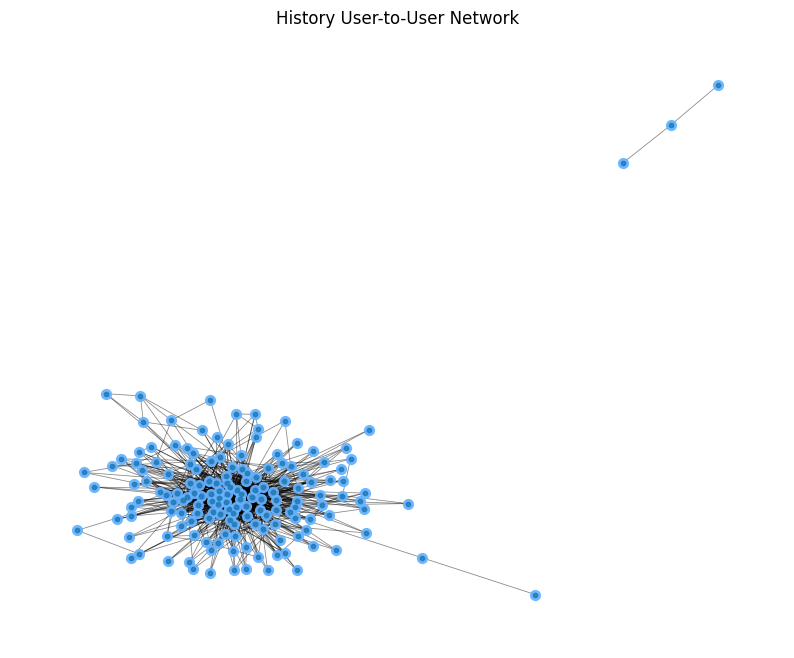

In [21]:
# 1. Build the user-to-user network
G_users, user_stats = build_history_user_network(df, min_shared_books=2)
# if your review-level df is named differently, swap `romance` for that

print(G_users.number_of_nodes(), "users")
print(G_users.number_of_edges(), "edges")

# 2. Optionally prune to more connected users (for a cleaner plot)
#    here we keep users with degree >= 3
active_users = [n for n, d in G_users.degree() if d >= 3]
H_users = G_users.subgraph(active_users).copy()

print(H_users.number_of_nodes(), "users in pruned graph")
print(H_users.number_of_edges(), "edges in pruned graph")

# 3. Plot the user-to-user network
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(10, 8))

pos = nx.spring_layout(H_users, k=0.15, iterations=50, seed=42)

# --- BIGGER DOTS (nodes) ---
nx.draw_networkx_nodes(
    H_users, pos,
    node_size=50,     # increase this (e.g., 50, 80, 120)
    alpha=0.9,
    node_color="#66b3ff"
)

# --- DARKER + THICKER LINES (edges) ---
nx.draw_networkx_edges(
    H_users, pos,
    width=0.6,        # increase this for darker lines (0.6 → 1.0 → 2.0)
    alpha=0.4,        # increase alpha for darker (0.2 → 0.4 → 0.7)
    edge_color="black"
)

nx.draw_networkx_nodes(H_users, pos,
                       node_size=10,
                       alpha=0.8)
nx.draw_networkx_edges(H_users, pos,
                       width=0.2,
                       alpha=0.2)

plt.title("History User-to-User Network")
plt.axis("off")
plt.show()

In [22]:
from networkx.algorithms.community import louvain_communities
import networkx as nx
import pandas as pd

def analyze_user_network(G, user_stats, genre_name="History Users", k_btwn=500):
    """
    Analyze a user-to-user network:
    - compute (approximate) centrality
    - compute communities
    - attach all metrics to user_stats
    - return metrics + summary for slides
    """

    # ---- centrality ----
    degree_c = nx.degree_centrality(G)

    # make sure k is not larger than number of nodes
    n_nodes = G.number_of_nodes()
    k = min(k_btwn, n_nodes)   # e.g., if n_nodes=200, we use k=200

    betweenness_c = nx.betweenness_centrality(
        G, k=k, weight="weight", normalized=True, seed=42
    )

    # ---- community detection (Louvain) ----
    comms = louvain_communities(G, weight="weight", seed=42)
    comm_id = {node: i for i, C in enumerate(comms) for node in C}
    nx.set_node_attributes(G, comm_id, "community")

    # ---- attach metrics to user_stats table ----
    stats = user_stats.copy()
    stats["genre"] = genre_name

    stats["degree"] = stats["user_id"].map(lambda u: G.degree(u))
    stats["degree_centrality"] = stats["user_id"].map(degree_c)
    stats["betweenness"] = stats["user_id"].map(betweenness_c)
    stats["community"] = stats["user_id"].map(comm_id)

    # ---- summary for slides ----
    summary = {
        "genre": genre_name,
        "n_users": G.number_of_nodes(),
        "n_edges": G.number_of_edges(),
        "density": nx.density(G),
        "avg_degree": stats["degree"].mean(),
        "avg_clustering": nx.average_clustering(G),
        "n_communities": len(comms),
        "largest_comm_size": max(len(c) for c in comms),
    }

    return stats, comms, summary

In [23]:
user_stats_full, user_comms, user_summary = analyze_user_network(G_users, user_stats, "History Users")

In [24]:
user_summary

{'genre': 'History Users',
 'n_users': 918,
 'n_edges': 1218,
 'density': 0.0028937783764905454,
 'avg_degree': 2.65359477124183,
 'avg_clustering': 0.1300230492740482,
 'n_communities': 666,
 'largest_comm_size': 53}

In [25]:
import networkx as nx
import pandas as pd
import numpy as np

# ----- pick your graph -----
G = H  # or G = your_graph

# If graph is empty, bail early
if G.number_of_nodes() == 0:
    raise ValueError("Graph has no nodes. Build H/G first.")

# ---- work on the largest connected component for path-based metrics ----
if nx.is_connected(G):
    GCC = G
else:
    GCC = G.subgraph(max(nx.connected_components(G), key=len)).copy()

# ---------- BASIC SIZE / DENSITY ----------
n, m = G.number_of_nodes(), G.number_of_edges()
n_gcc, m_gcc = GCC.number_of_nodes(), GCC.number_of_edges()
density = nx.density(G)

print(f"Nodes={n}, Edges={m}, Density={density:.4f}")
print(f"Largest component: nodes={n_gcc}, edges={m_gcc} ({n_gcc/n:.1%} of nodes)")

# ---------- DEGREE & STRENGTH ----------
deg = dict(G.degree())
wdeg = dict(G.degree(weight="weight"))  # weighted degree = strength

deg_ser = pd.Series(deg, name="degree").sort_values(ascending=False)
wdeg_ser = pd.Series(wdeg, name="strength").sort_values(ascending=False)

print("\nTop 10 by degree:")
print(deg_ser.head(10))
print("\nTop 10 by weighted degree (strength):")
print(wdeg_ser.head(10))

# ---------- LOCAL CLUSTERING ----------
# unweighted and weighted versions
clust = nx.clustering(G)
wclust = nx.clustering(G, weight="weight")
print(f"\nAverage clustering (unweighted): {np.mean(list(clust.values())):.4f}")
print(f"Average clustering (weighted):   {np.mean(list(wclust.values())):.4f}")
print(f"Transitivity: {nx.transitivity(G):.4f}")

# ---------- ASSORTATIVITY ----------
try:
    print(f"Degree assortativity: {nx.degree_assortativity_coefficient(G):.4f}")
except Exception as e:
    print("Assortativity not available:", e)

# ---------- PATHS / DISTANCES (on GCC) ----------
# These can be expensive on huge graphs; GCC keeps it reasonable
avg_path_len = nx.average_shortest_path_length(GCC)
diameter = nx.diameter(GCC)
radius = nx.radius(GCC)

print("\n--- Shortest-path metrics (on largest component) ---")
print(f"Average shortest path length: {avg_path_len:.4f}")
print(f"Diameter: {diameter}")
print(f"Radius: {radius}")

# ---------- CENTRALITIES (on GCC) ----------
print("\n--- Centralities (largest component) ---")

# Betweenness (weighted)
btw = nx.betweenness_centrality(GCC, weight="weight", normalized=True)
print("Top 10 betweenness:")
print(pd.Series(btw).sort_values(ascending=False).head(10))

# Closeness (weighted shortest paths)
clo = nx.closeness_centrality(GCC, distance=lambda u,v,edata: 1/edata.get("weight",1))
# (Alternative: distance='weight' if higher weight = longer distance)
print("\nTop 10 closeness:")
print(pd.Series(clo).sort_values(ascending=False).head(10))

# Eigenvector centrality (use max_iter safeguard)
try:
    eig = nx.eigenvector_centrality_numpy(GCC, weight="weight")
except Exception:
    eig = nx.eigenvector_centrality(GCC, weight="weight", max_iter=1000)
print("\nTop 10 eigenvector:")
print(pd.Series(eig).sort_values(ascending=False).head(10))

# PageRank (weighted)
pr = nx.pagerank(GCC, weight="weight", alpha=0.85)
print("\nTop 10 PageRank:")
print(pd.Series(pr).sort_values(ascending=False).head(10))

# ---------- K-CORE & CONNECTIVITY ----------
core_num = nx.core_number(G)
print(f"\nMax k-core index: {max(core_num.values())}")
print("Top 10 core numbers:")
print(pd.Series(core_num).sort_values(ascending=False).head(10))

try:
    edge_conn = nx.edge_connectivity(GCC)
    node_conn = nx.node_connectivity(GCC)
    print(f"\nEdge connectivity (GCC): {edge_conn}")
    print(f"Node connectivity (GCC): {node_conn}")
except Exception as e:
    print("Connectivity metrics not available:", e)

# ---------- COMMUNITY DETECTION (greedy modularity) ----------
from networkx.algorithms.community import greedy_modularity_communities, modularity
comms = list(greedy_modularity_communities(GCC, weight="weight"))
mod = modularity(GCC, comms, weight="weight")
sizes = sorted([len(c) for c in comms], reverse=True)

print(f"\nCommunities (greedy modularity): {len(comms)}  |  Modularity: {mod:.4f}")
print("Top 10 community sizes:", sizes[:10])

# ---------- OPTIONAL: COLLECT PER-NODE METRICS TABLE ----------
metrics_df = pd.DataFrame({
    "degree": pd.Series(deg),
    "strength": pd.Series(wdeg),
    "clust": pd.Series(clust),
    "wclust": pd.Series(wclust),
})

# Merge centralities for GCC nodes only (others will be NaN)
metrics_df["betweenness"] = pd.Series(btw)
metrics_df["closeness"] = pd.Series(clo)
metrics_df["eigenvector"] = pd.Series(eig)
metrics_df["pagerank"] = pd.Series(pr)
metrics_df["core"] = pd.Series(core_num)

# Sort by a key metric if you like:
print("\nPer-node metrics (top 15 by PageRank):")
print(metrics_df.sort_values("pagerank", ascending=False).head(15).round(4))


Nodes=69, Edges=171, Density=0.0729
Largest component: nodes=69, edges=171 (100.0% of nodes)

Top 10 by degree:
c4f655f2ed79599a9259d7762313f3f3    52
fc0a0792fd1c30427acdbfecbf5b0a20    24
9fb3243336a3c406f5c19c548d7e5570    21
3b3f26019b3a5dbecb49c5faf1abce4c    16
2aff4808564d76669bf41a5e7cb60124    16
d6804aa6e3a96b8e1104b8b9ac3fe882    15
246eac0ca4d02e73d8768a5acb9b89d7    11
b62e7452ce0cebbd1cfed2fe5b6852a5    10
792500e85277fa7ada535de23e7eb4c3    10
467ed8f03548be6c2d9228f9a2f7b2ea     8
Name: degree, dtype: int64

Top 10 by weighted degree (strength):
c4f655f2ed79599a9259d7762313f3f3    388
fc0a0792fd1c30427acdbfecbf5b0a20    173
9fb3243336a3c406f5c19c548d7e5570    153
3b3f26019b3a5dbecb49c5faf1abce4c    104
d6804aa6e3a96b8e1104b8b9ac3fe882     97
2aff4808564d76669bf41a5e7cb60124     84
246eac0ca4d02e73d8768a5acb9b89d7     67
b62e7452ce0cebbd1cfed2fe5b6852a5     64
dea5bda3eaee375c4ab59fd399bc37db     52
467ed8f03548be6c2d9228f9a2f7b2ea     48
Name: strength, dtype: int64

Av

# Text Analytics

## Preprocessing

In [26]:
import re
import string
import nltk
from nltk.corpus import stopwords

# -------------------------------------------------------------------
# 4. Text cleaning: lowercase, remove punctuation, remove stopwords
# -------------------------------------------------------------------
# Download stopwords once (same as class code)
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_review(text: str) -> str:
    # lowercase
    text = text.lower()
    
    # remove markdown-style spoiler markers or stars (optional)
    text = re.sub(r"\*+", " ", text)
    
    # remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    
    # remove stopwords
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]
    
    return " ".join(tokens)

# Apply cleaning
df["review_text_clean"] = df["review_text"].astype(str).apply(clean_review)

df[["user_id", "book_id", "rating", "review_text_clean"]].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ftaghizadeh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,user_id,book_id,rating,review_text_clean
0,8842281e1d1347389f2ab93d60773d4d,29893493,5,havent read nonfiction book engaging time amaz...
1,8842281e1d1347389f2ab93d60773d4d,8191070,5,best book series best book american history th...
2,8842281e1d1347389f2ab93d60773d4d,27161156,0,recommended reading understand going middle am...
3,8842281e1d1347389f2ab93d60773d4d,16064871,5,fascinating look early part lbjs life career f...
4,8842281e1d1347389f2ab93d60773d4d,19398490,4,beautiful story rare encounter book good job p...


## TF-IDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# -----------------------------------------------------------
# TF-IDF Vectorization (keywords)
# -----------------------------------------------------------
tfidf = TfidfVectorizer(
    max_df=0.9,
    min_df=20,
    ngram_range=(1,2),
    stop_words="english"
)

tfidf_matrix = tfidf.fit_transform(df["review_text_clean"])
feature_names = tfidf.get_feature_names_out()

print("TF-IDF matrix shape:", tfidf_matrix.shape)


TF-IDF matrix shape: (10000, 4551)


In [28]:
import numpy as np

# Compute mean TF-IDF score per term across docs
mean_scores = np.array(tfidf_matrix.mean(axis=0)).flatten()
top_idx = mean_scores.argsort()[::-1][:25]   # top 25 keywords

top_keywords = [(feature_names[i], mean_scores[i]) for i in top_idx]

print("Top History TF-IDF Keywords:")
for word, score in top_keywords:
    print(f"{word:<20}  {score:.4f}")


Top History TF-IDF Keywords:
book                  0.0534
read                  0.0352
story                 0.0290
good                  0.0215
like                  0.0205
really                0.0200
love                  0.0181
time                  0.0179
life                  0.0167
characters            0.0162
great                 0.0161
interesting           0.0156
loved                 0.0154
history               0.0153
reading               0.0152
books                 0.0143
enjoyed               0.0128
didnt                 0.0117
series                0.0116
way                   0.0115
author                0.0114
people                0.0113
think                 0.0113
historical            0.0111
little                0.0111


In [29]:
#!pip install langdetect

In [30]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 42   # for reproducibility

def detect_lang(text):
    text = str(text)
    if not text.strip():
        return "unknown"
    try:
        return detect(text)
    except:
        return "error"

# run on original (not cleaned) text, or cleaned, either is fine
df["lang"] = df["review_text"].astype(str).apply(detect_lang)

df["lang"].value_counts().head()

lang
en    9256
cy     178
pt      89
fi      87
es      66
Name: count, dtype: int64

In [31]:
df_en = df[df["lang"] == "en"].copy()
print("Rows before:", len(df), "after EN filter:", len(df_en))

Rows before: 10000 after EN filter: 9256


In [32]:

import gensim
from gensim import corpora

# -----------------------------------------------------------
# Prepare tokens for LDA
# -----------------------------------------------------------
df_en["tokens"] = df_en["review_text_clean"].str.split()

dictionary = corpora.Dictionary(df_en["tokens"])
corpus = [dictionary.doc2bow(text) for text in df_en["tokens"]]

print("Number of tokens:", len(dictionary))


Number of tokens: 43309


## LDA

In [33]:
# -----------------------------------------------------------
# Train LDA model
# -----------------------------------------------------------
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=6,
    passes=10,
    random_state=42
)

lda_model.print_topics(num_words=10)


[(0,
  '0.031*"book" + 0.016*"read" + 0.011*"story" + 0.010*"one" + 0.010*"like" + 0.009*"really" + 0.007*"characters" + 0.007*"time" + 0.007*"would" + 0.006*"love"'),
 (1,
  '0.005*"one" + 0.003*"world" + 0.003*"new" + 0.003*"first" + 0.003*"novel" + 0.003*"war" + 0.002*"man" + 0.002*"battle" + 0.002*"young" + 0.002*"king"'),
 (2,
  '0.011*"history" + 0.004*"one" + 0.004*"president" + 0.004*"political" + 0.004*"lincoln" + 0.003*"american" + 0.003*"book" + 0.003*"states" + 0.003*"washington" + 0.003*"government"'),
 (3,
  '0.012*"book" + 0.008*"story" + 0.006*"life" + 0.006*"war" + 0.005*"people" + 0.005*"one" + 0.004*"history" + 0.004*"read" + 0.004*"world" + 0.004*"many"'),
 (4,
  '0.009*"series" + 0.007*"love" + 0.004*"man" + 0.004*"set" + 0.003*"books" + 0.003*"young" + 0.003*"hes" + 0.002*"lord" + 0.002*"looking" + 0.002*"children"'),
 (5,
  '0.007*"golden" + 0.007*"hours" + 0.006*"hornblower" + 0.005*"radio" + 0.005*"marie" + 0.005*"bunk" + 0.004*"ill" + 0.004*"cs" + 0.003*"fores

In [34]:
for i, topic in lda_model.print_topics(num_topics=6, num_words=10):
    print(f"\nTopic {i}:")
    print(topic)



Topic 0:
0.031*"book" + 0.016*"read" + 0.011*"story" + 0.010*"one" + 0.010*"like" + 0.009*"really" + 0.007*"characters" + 0.007*"time" + 0.007*"would" + 0.006*"love"

Topic 1:
0.005*"one" + 0.003*"world" + 0.003*"new" + 0.003*"first" + 0.003*"novel" + 0.003*"war" + 0.002*"man" + 0.002*"battle" + 0.002*"young" + 0.002*"king"

Topic 2:
0.011*"history" + 0.004*"one" + 0.004*"president" + 0.004*"political" + 0.004*"lincoln" + 0.003*"american" + 0.003*"book" + 0.003*"states" + 0.003*"washington" + 0.003*"government"

Topic 3:
0.012*"book" + 0.008*"story" + 0.006*"life" + 0.006*"war" + 0.005*"people" + 0.005*"one" + 0.004*"history" + 0.004*"read" + 0.004*"world" + 0.004*"many"

Topic 4:
0.009*"series" + 0.007*"love" + 0.004*"man" + 0.004*"set" + 0.003*"books" + 0.003*"young" + 0.003*"hes" + 0.002*"lord" + 0.002*"looking" + 0.002*"children"

Topic 5:
0.007*"golden" + 0.007*"hours" + 0.006*"hornblower" + 0.005*"radio" + 0.005*"marie" + 0.005*"bunk" + 0.004*"ill" + 0.004*"cs" + 0.003*"forester

## Sentiment Analysis

In [35]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# -----------------------------------------------------------
# Compute sentiment scores
# -----------------------------------------------------------
df_en["sentiment"] = df_en["review_text"].astype(str).apply(
    lambda x: sia.polarity_scores(x)["compound"]
)

df_en[["rating", "sentiment"]].head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ftaghizadeh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,rating,sentiment
0,5,0.9983
1,5,0.9515
2,0,0.8126
3,5,0.9974
4,4,0.5238


In [36]:
history_sentiment_mean = df_en["sentiment"].mean()
history_sentiment_mean


0.5056630401901469

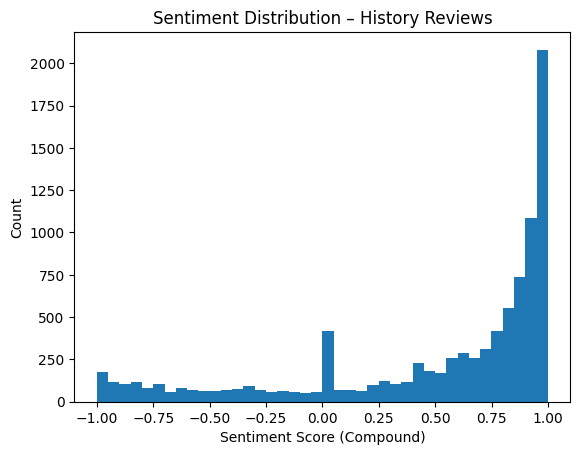

In [37]:
import matplotlib.pyplot as plt

plt.hist(df_en["sentiment"], bins=40)
plt.title("Sentiment Distribution – History Reviews")
plt.xlabel("Sentiment Score (Compound)")
plt.ylabel("Count")
plt.show()


In [38]:
# For each document, find the most probable topic
def get_dominant_topic(bow):
    topics = lda_model.get_document_topics(bow, minimum_probability=0.0)
    return max(topics, key=lambda x: x[1])[0]

df_en["topic_id"] = [get_dominant_topic(bow) for bow in corpus]

# Corrected line:
df_en[["review_text", "sentiment", "topic_id"]].head()


,review_text,sentiment,topic_id
0,I haven't read a non-fiction book this engagin...,0.9983,0
1,"Best book of the series, and best book about A...",0.9515,2
2,Recommended reading to understand what is goin...,0.8126,2
3,A fascinating look at the early part of LBJ's ...,0.9974,0
4,A beautiful story. It is rare to encounter a b...,0.5238,0


In [39]:
import pandas as pd

# Average sentiment and count of reviews per topic
topic_sentiment = (
    df_en.groupby("topic_id")["sentiment"]
           .agg(["mean", "count"])
           .sort_values("mean", ascending=False)
)

topic_sentiment


,mean,count
topic_id,,
0,0.557216,6251
4,0.485707,117
3,0.435055,2332
2,0.286340,317
1,0.209375,212
5,-0.343381,27


In [40]:
# Get top words for each topic (for interpretation)
topic_labels = {}
for i in range(lda_model.num_topics):
    words = ", ".join([w for w, _ in lda_model.show_topic(i, topn=7)])
    topic_labels[i] = words

topic_sentiment["top_words"] = topic_sentiment.index.map(topic_labels)

topic_sentiment

,mean,count,top_words
topic_id,,,
0,0.557216,6251,"book, read, story, one, like, really, characters"
4,0.485707,117,"series, love, man, set, books, young, hes"
3,0.435055,2332,"book, story, life, war, people, one, history"
2,0.286340,317,"history, one, president, political, lincoln, a..."
1,0.209375,212,"one, world, new, first, novel, war, man"
5,-0.343381,27,"golden, hours, hornblower, radio, marie, bunk,..."


# Book to Book

In [41]:
import pandas as pd
import networkx as nx
from itertools import combinations

def build_history_network(df, min_shared_readers=2):
    """
    Build a book-to-book network:
    nodes = books
    edges = books reviewed by same user
    """
    
    df = df[['user_id', 'book_id', 'rating', 'sentiment']].dropna()

    # --- Book-level stats ---
    book_stats = (
        df.groupby('book_id')
          .agg(avg_rating=('rating', 'mean'),
               review_cnt=('rating', 'size'),
               avg_sentiment=('sentiment', 'mean'))
          .reset_index()
    )

    # --- user → their books ---
    user_books = (
        df[['user_id', 'book_id']]
        .drop_duplicates()
        .groupby('user_id')['book_id']
        .apply(list)
    )

    # --- build all book pairs per user ---
    edge_pairs = []
    for books in user_books:
        books = sorted(set(books))
        if len(books) < 2:
            continue
        edge_pairs.extend(combinations(books, 2))

    # --- count shared reviewers ---
    edge_df = (
        pd.DataFrame(edge_pairs, columns=['book_i', 'book_j'])
        .value_counts()
        .reset_index(name='weight')
    )

    # threshold to keep meaningful edges
    edge_df = edge_df[edge_df['weight'] >= min_shared_readers]

    # --- build graph ---
    G = nx.Graph()
    
    # add nodes with attributes
    for _, row in book_stats.iterrows():
        G.add_node(
            row['book_id'],
            avg_rating=row['avg_rating'],
            review_cnt=int(row['review_cnt']),
            avg_sentiment=row['avg_sentiment']
        )

    # add weighted edges
    for _, row in edge_df.iterrows():
        G.add_edge(row['book_i'], row['book_j'], weight=int(row['weight']))

    print(f"History Network: {G.number_of_nodes()} books, {G.number_of_edges()} edges")

    return G, book_stats


In [42]:
# df with romance reviews (10k rows, already cleaned)
# must have: user_id, book_id, rating, sentiment
G_history, history_books = build_history_network(df_en, min_shared_readers=2)


History Network: 6900 books, 3055 edges


In [43]:
import matplotlib.pyplot as plt

def plot_history_network(G, title="History book-to-book network", max_nodes=300):
    # take the largest connected component so the layout looks nicer
    if not nx.is_connected(G):
        largest = max(nx.connected_components(G), key=len)
        H = G.subgraph(largest).copy()
    else:
        H = G

    # if still huge, keep only top nodes by degree
    if H.number_of_nodes() > max_nodes:
        deg = dict(H.degree())
        top_nodes = sorted(deg, key=deg.get, reverse=True)[:max_nodes]
        H = H.subgraph(top_nodes).copy()

    pos = nx.spring_layout(H, k=0.15, iterations=40, seed=42)

    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(H, pos, node_size=30, alpha=0.9)
    nx.draw_networkx_edges(H, pos, width=0.3, alpha=0.3)
    plt.title(title)
    plt.axis("off")
    plt.show()


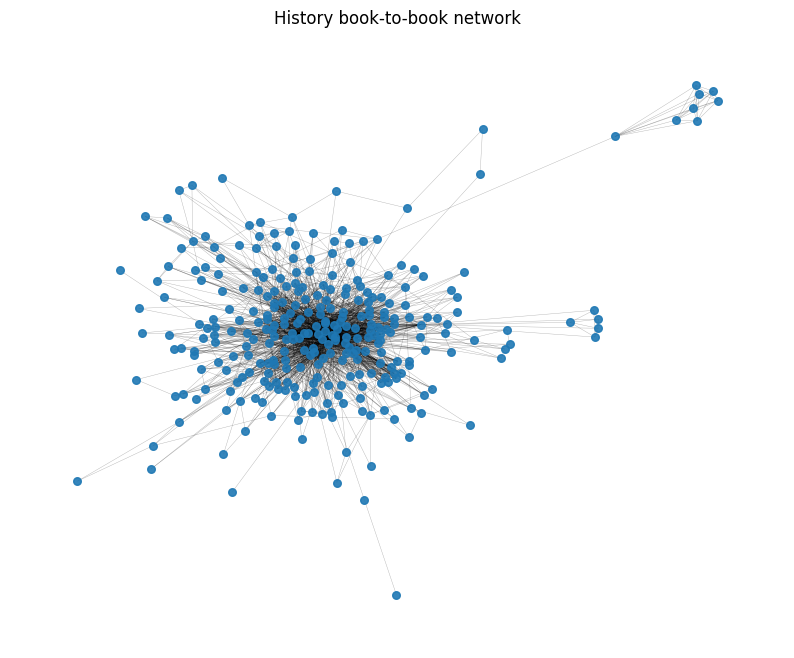

In [44]:
plot_history_network(G_history)


In [45]:
from networkx.algorithms.community import louvain_communities
import networkx as nx
import pandas as pd

def analyze_network(G, book_stats, genre_name="Romance"):
    # ---- centrality measures ----
    degree_c = nx.degree_centrality(G)
    betweenness_c = nx.betweenness_centrality(G, weight="weight", normalized=True)
    
    # ---- community detection (Louvain) ----
    comms = louvain_communities(G, weight="weight", seed=42)
    comm_id = {node: i for i, C in enumerate(comms) for node in C}
    nx.set_node_attributes(G, comm_id, "community")
    
    # ---- attach metrics back to book table ----
    stats = book_stats.copy()
    stats["genre"] = genre_name
    stats["degree"] = stats["book_id"].map(lambda b: G.degree(b))
    stats["degree_centrality"] = stats["book_id"].map(degree_c)
    stats["betweenness"] = stats["book_id"].map(betweenness_c)
    stats["community"] = stats["book_id"].map(comm_id)
    
    # ---- overall summary for slides ----
    summary = {
        "genre": genre_name,
        "n_books": G.number_of_nodes(),
        "n_edges": G.number_of_edges(),
        "density": nx.density(G),
        "avg_degree": stats["degree"].mean(),
        "avg_clustering": nx.average_clustering(G),
        "n_communities": len(comms),
        "largest_comm_size": max(len(c) for c in comms),
    }
    
    return stats, comms, summary


In [46]:
history_stats, history_comms, history_summary = analyze_network(
    G_history, history_books, "History"
)

history_summary    # nice dict of network properties for your slide


{'genre': 'History',
 'n_books': 6900,
 'n_edges': 3055,
 'density': 0.00012835298541481543,
 'avg_degree': 0.8855072463768116,
 'avg_clustering': 0.04182983606676727,
 'n_communities': 6382,
 'largest_comm_size': 125}

In [47]:
# Top hubs = highest degree
top_hubs_history = (
    history_stats
    .sort_values("degree", ascending=False)
    [["book_id", "avg_rating", "avg_sentiment", "review_cnt", "degree"]]
    .head(10)
)

# Top bridges = highest betweenness
top_bridges_history = (
    history_stats
    .sort_values("betweenness", ascending=False)
    [["book_id", "avg_rating", "avg_sentiment", "review_cnt", "betweenness"]]
    .head(10)
)


In [48]:
import matplotlib.pyplot as plt

def plot_book_clusters(G, stats, title="History book clusters", max_nodes=300):
    # use largest connected component so plot is clean
    if not nx.is_connected(G):
        largest = max(nx.connected_components(G), key=len)
        H = G.subgraph(largest).copy()
    else:
        H = G

    # if still very big, keep top nodes by degree
    if H.number_of_nodes() > max_nodes:
        deg = dict(H.degree())
        top_nodes = sorted(deg, key=deg.get, reverse=True)[:max_nodes]
        H = H.subgraph(top_nodes).copy()
    
    pos = nx.spring_layout(H, k=0.15, iterations=50, seed=42)

    # node attributes from stats
    stats_indexed = stats.set_index("book_id")
    comm = nx.get_node_attributes(H, "community")
    colors = [comm[n] for n in H.nodes()]
    sizes = [20 + 0.5 * stats_indexed.loc[n, "review_cnt"] for n in H.nodes()]

    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(
        H, pos,
        node_size=sizes,
        node_color=colors,
        cmap="tab20",
        alpha=0.9
    )
    nx.draw_networkx_edges(H, pos, width=0.3, alpha=0.3)
    plt.title(title)
    plt.axis("off")
    plt.show()


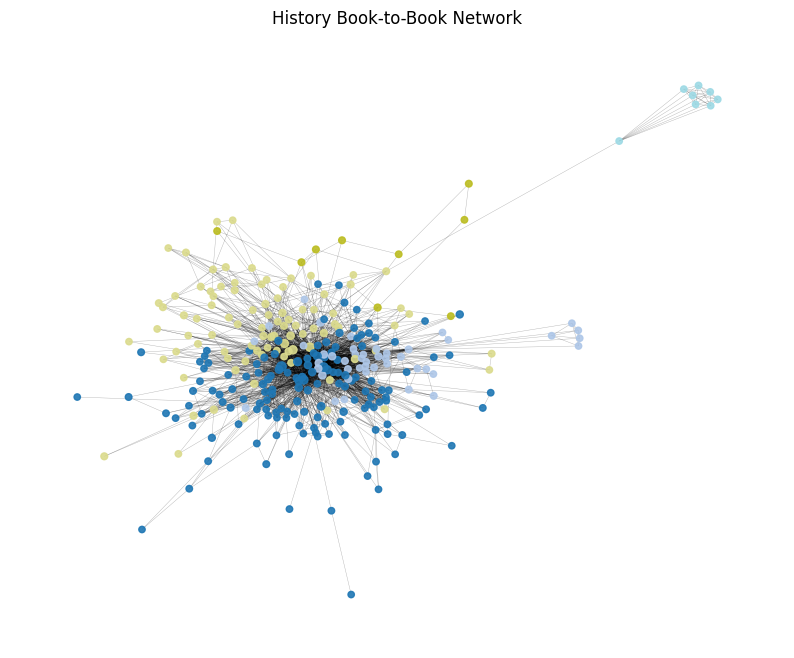

In [49]:
plot_book_clusters(G_history, history_stats, title="History Book-to-Book Network")


In [50]:
import networkx as nx

# original graph
G_full = G_history

# keep only strong edges: weight >= 3 (you can try 4 too)
G_strong = nx.Graph(
    (u, v, d)
    for u, v, d in G_full.edges(data=True)
    if d.get("weight", 1) >= 3
)

print("Nodes:", G_strong.number_of_nodes())
print("Edges:", G_strong.number_of_edges())


Nodes: 132
Edges: 474


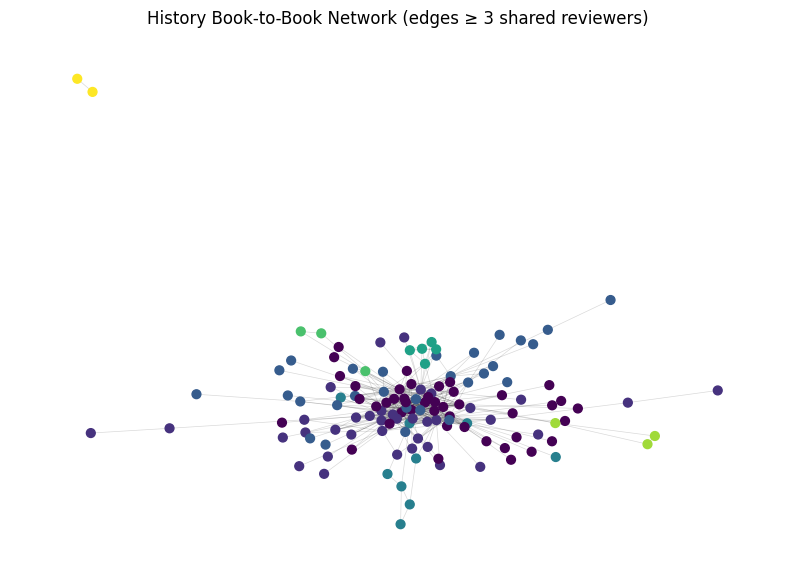

In [51]:
# example: Louvain or greedy modularity
import networkx as nx

communities = nx.algorithms.community.greedy_modularity_communities(G_strong)
comm_map = {}
for i, comm in enumerate(communities):
    for n in comm:
        comm_map[n] = i

nx.set_node_attributes(G_strong, comm_map, "community")

# plot
pos = nx.spring_layout(G_strong, k=0.15, iterations=50, seed=42)
colors = [comm_map[n] for n in G_strong.nodes()]

plt.figure(figsize=(10,7))
nx.draw_networkx_nodes(G_strong, pos, node_color=colors, node_size=40)
nx.draw_networkx_edges(G_strong, pos, alpha=0.15, width=0.5)
plt.title("History Book-to-Book Network (edges ≥ 3 shared reviewers)")
plt.axis("off")
plt.show()

In [52]:
import networkx as nx

# original graph
G_full = G_history

# keep only strong edges: weight >= 3 (you can try 4 too)
G_strong = nx.Graph(
    (u, v, d)
    for u, v, d in G_full.edges(data=True)
    if d.get("weight", 1) >= 4
)

print("Nodes:", G_strong.number_of_nodes())
print("Edges:", G_strong.number_of_edges())

Nodes: 56
Edges: 147


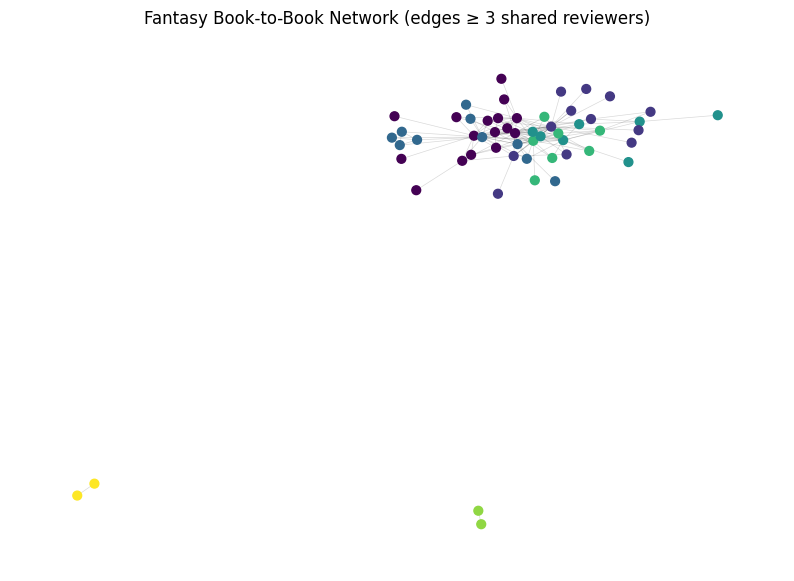

In [53]:
# example: Louvain or greedy modularity
import networkx as nx

communities = nx.algorithms.community.greedy_modularity_communities(G_strong)
comm_map = {}
for i, comm in enumerate(communities):
    for n in comm:
        comm_map[n] = i

nx.set_node_attributes(G_strong, comm_map, "community")

# plot
pos = nx.spring_layout(G_strong, k=0.15, iterations=50, seed=42)
colors = [comm_map[n] for n in G_strong.nodes()]

plt.figure(figsize=(10,7))
nx.draw_networkx_nodes(G_strong, pos, node_color=colors, node_size=40)
nx.draw_networkx_edges(G_strong, pos, alpha=0.15, width=0.5)
plt.title("Fantasy Book-to-Book Network (edges ≥ 3 shared reviewers)")
plt.axis("off")
plt.show()

# Bridge Books

In [54]:
import pandas as pd

G = G_history   # just for convenience

bridge_books = []

for n in G.nodes():
    # communities of this book's neighbors
    neigh_comms = {G.nodes[v]['community'] for v in G.neighbors(n)}
    if len(neigh_comms) > 1:   # touches multiple communities
        bridge_books.append({
            "book_id": n,
            "degree": G.degree[n],
            "n_neighbor_communities": len(neigh_comms)
        })

bridge_df = (
    pd.DataFrame(bridge_books)
      .sort_values(["n_neighbor_communities", "degree"], ascending=False)
)

print("Number of bridge books:", len(bridge_df))
bridge_df.head(20)   # top bridge books


Number of bridge books: 282


,book_id,degree,n_neighbor_communities
148,4667024.0,142,8
8,2657.0,127,8
270,27161156.0,44,8
134,2728527.0,128,7
32,10964.0,115,7
45,19063.0,106,7
25,7445.0,90,7
60,43641.0,74,7
24,7244.0,72,7
140,3367956.0,72,7


In [55]:
bridge_clean = top_bridges_history[['book_id', 'betweenness', 'avg_rating']]
bridge_clean

,book_id,betweenness,avg_rating
3129,4667024,0.000597,4.272727
44,2657,0.000553,4.571429
271,19063,0.000530,4.264151
2879,2728527,0.000395,4.107143
176,10964,0.000355,3.909091
134,7445,0.000292,3.894737
3891,8664353,0.000244,4.642857
3614,7148256,0.000222,3.000000
5778,21853621,0.000202,4.666667
6585,29430012,0.000202,4.500000
